In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.classification import *

In [2]:
pd.set_option("display.max_columns", None)
data = pd.read_csv("data/data.csv")
data = data.drop(["Unnamed: 32"], axis=1)
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Splitting Data into Train, Validation, and Test Sets

In [3]:
s = setup(data, target = 'diagnosis', ignore_features = ['id'], transformation=True, pca=True, pca_components=0.95, normalize=True, normalize_method="minmax")

,Description,Value
0,Session id,2056
1,Target,diagnosis
2,Target type,Binary
3,Target mapping,"B: 0, M: 1"
4,Original data shape,"(569, 32)"
5,Transformed data shape,"(569, 10)"
6,Transformed train set shape,"(398, 10)"
7,Transformed test set shape,"(171, 10)"
8,Ignore features,1
9,Numeric features,30


In [4]:
# compare all models
best_model = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9774,0.9944,0.9529,0.9856,0.9684,0.9509,0.9518,5.2460
lda,Linear Discriminant Analysis,0.9749,0.9935,0.9390,0.9923,0.9643,0.9450,0.9466,5.7200
et,Extra Trees Classifier,0.9672,0.9930,0.9319,0.9799,0.9538,0.9285,0.9309,10.2860
qda,Quadratic Discriminant Analysis,0.9698,0.9925,0.9457,0.9728,0.9586,0.9348,0.9357,5.0960
lightgbm,Light Gradient Boosting Machine,0.9773,0.9919,0.9586,0.9820,0.9685,0.9508,0.9529,7.0290
knn,K Neighbors Classifier,0.9724,0.9903,0.9529,0.9732,0.9623,0.9406,0.9415,5.3200
ada,Ada Boost Classifier,0.9597,0.9900,0.9452,0.9480,0.9446,0.9130,0.9153,6.2900
rf,Random Forest Classifier,0.9597,0.9892,0.9248,0.9652,0.9429,0.9119,0.9141,4.9650
gbc,Gradient Boosting Classifier,0.9698,0.9886,0.9386,0.9816,0.9577,0.9343,0.9370,5.3170
nb,Naive Bayes,0.9446,0.9881,0.8776,0.9702,0.9204,0.8782,0.8819,5.1380


In [5]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2056, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
# tune best model
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9750,1.0000,1.0000,0.9375,0.9677,0.9474,0.9487
1,0.9000,0.9760,0.8667,0.8667,0.8667,0.7867,0.7867
2,0.9750,1.0000,1.0000,0.9375,0.9677,0.9474,0.9487
3,0.9750,1.0000,0.9333,1.0000,0.9655,0.9459,0.9473
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9750,0.9787,0.9333,1.0000,0.9655,0.9459,0.9473
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


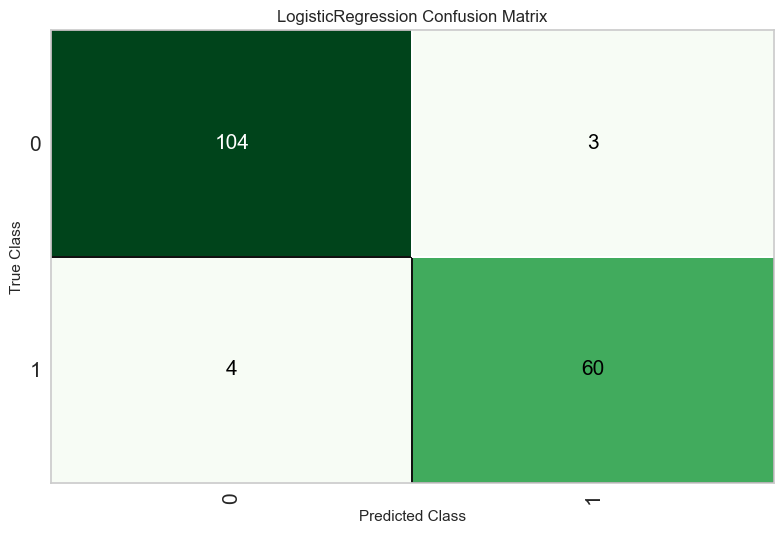

In [7]:
# Confusion Matrix
plot_model(tuned_best_model, plot = 'confusion_matrix')

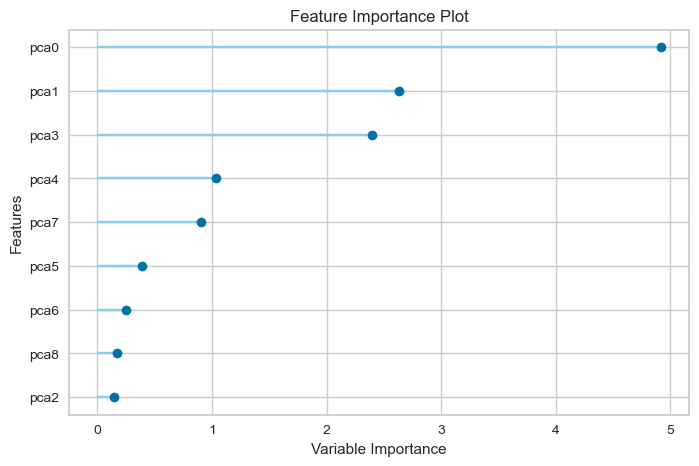

In [8]:
# Confusion Matrix
plot_model(tuned_best_model, plot = 'feature')

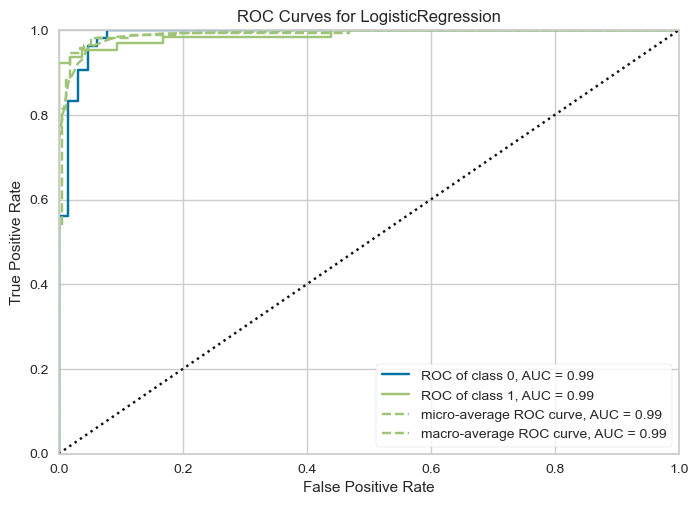

In [9]:
# Confusion Matrix
plot_model(tuned_best_model, plot = 'auc')